In [1]:
import numpy as np
import matplotlib.pyplot as plt

import zfit
from zfit.core.loss import ExtendedUnbinnedNLL
from zfit.minimize import Minuit

from skstats.hypotests.calculators import AsymptoticCalculator
from skstats.hypotests import Discovery
from skstats.hypotests.parameters import POI

/Users/matthieumarinangeli/anaconda3/envs/tfn/lib/python3.7/site-packages/zfit/util/execution.py:61: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


### Fit of a Gaussian signal over an exponential background:

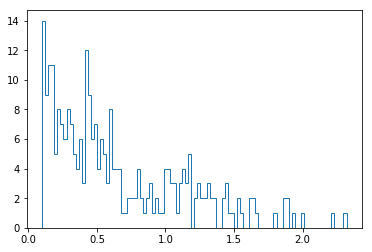

In [2]:
bounds = (0.1, 3.0)

# Data and signal

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 300)
peak = np.random.normal(1.2, 0.1, 25)
data = np.concatenate((data,peak))
data = data[(data > bounds[0]) & (data < bounds[1])]

plt.hist(data, bins=100, histtype='step');

In [3]:
obs = zfit.Space('x', limits=bounds)

In [4]:
lambda_ = zfit.Parameter("lambda",-2.0, -4.0, -1.0)
Nsig = zfit.Parameter("Nsig", 20., -20., len(data))
Nbkg = zfit.Parameter("Nbkg", len(data), 0., len(data)*1.1)

In [5]:
signal = Nsig * zfit.pdf.Gauss(obs=obs, mu=1.2, sigma=0.1)
background =  Nbkg * zfit.pdf.Exponential(obs=obs, lambda_=lambda_)
tot_model = signal + background

In [6]:
# Create the negative log likelihood
from zfit.core.loss import ExtendedUnbinnedNLL, UnbinnedNLL
data_ = zfit.data.Data.from_numpy(obs=obs, array=data)
nll = ExtendedUnbinnedNLL(model=[tot_model], data=[data_], fit_range=[obs]) 

In [7]:
# Instantiate a minuit minimizer
minimizer = Minuit()

In [8]:
# minimisation of the loss function
minimum = minimizer.minimize(loss=nll)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


FCN = -1145.206731390898 
 TOTAL NCALL = 70 
 NCALLS = 70 
 
 
 EDM = 2.073263880560436e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,Nbkg,251.519,16.7508,,,0,298.1,No
1,Nsig,19.4765,7.12433,,,-20,271,No
2,lambda,-1.93315,0.140796,,,-4,-1,No


In [9]:
def plotfitresult(pdf, bounds, nbins, data):
    x = np.linspace(*bounds, num=1000)
    pdf = zfit.run(tot_model.pdf(x, norm_range=bounds)* tot_model.get_yield())
    _ = plt.plot(x, ((bounds[1] - bounds[0])/nbins)*(pdf), "-r", label="fit result")

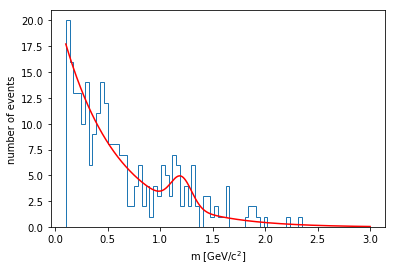

In [10]:
nbins = 80
plt.hist(data, bins=nbins, histtype='step', range=bounds);
plotfitresult(tot_model, bounds, nbins, data)
plt.xlabel("m [GeV/c$^2$]")
plt.ylabel("number of events")
plt.savefig("fit_discovery_ex.png")

### Discovery test

In a discovery test the null hypothesis is the absence of signal, .i.e Nsig = 0.

In [11]:
# instantation of the calculator
calculator = AsymptoticCalculator(nll, minimizer)
calculator.bestfit = minimum #optionnal

In [12]:
# parameter of interest of the null hypothesis
poinull = POI(Nsig, 0)

In [13]:
# instantation of the discovery test
discovery_test = Discovery(calculator, [poinull])

In [14]:
pnull, significance = discovery_test.result()

Compute qobs for the null hypothesis!

p_value for the Null hypothesis = 0.0007571045089567185
Significance = 3.1719464953752565
